# Applied Statistics - Project

**Author: Cecilia Pastore**

---

**Project assignement**

> Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in Markdown and code comments, clean code, and regular commits. Use plots as appropriate.
>
> In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables: a treatment group and the weight of plants within those groups.
>
>Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this, you should:
>
>1. Download and save the dataset to your repository.
>2. Describe the dataset in your notebook.
>3. Describe what a t-test is, how it works, and what the assumptions are.
>4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.
>5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2
>6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

#### **INTRODUCTION**

In [44]:
#import needed libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import requests

### **1: Download and save the dataset in the repository** 

Focus of this section is donload the dataset [PlantGrowth R dataset []](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv) and save it in the repository. 

In order to perform the task first the variable `url`, which contains the URL from where the dataset can be downloaded, and the variable `file_name`, which contains the name of the dataset, are defined.

The code then checks if the dataset exists in the path where the repository is saved using the function `os.path.isfile` [[]](https://www.geeksforgeeks.org/python-os-path-isfile-method/). If the file exists, a message is printed indicating this.

If the file doesn't exist:
- An HTTP GET request is sent to download the CSV file from the given URL using the requests.get() method [[andrewbeatty_wsaa-course-material_Lab04.1 []]](https://github.com/andrewbeattycourseware/wsaa-course-material/blob/main/labs/Lab04.1%20requests.pdf) [[]](https://requests.readthedocs.io/en/latest/user/quickstart/#make-a-request).
- The request status is checked with `response.status_code` [[]](https://www.geeksforgeeks.org/response-status_code-python-requests/)
- If the request is successful (HTTP status code 200), the file content is written to a local file `(PlantGrowth.csv)` using `open` and binary write mode ('wb')[[andrewbeatty_pands-course-material_files []](https://github.com/andrewbeattycourseware/pands-course-material/blob/main/jupyternotebooks/topic07-files.ipynb).



In [45]:
# Define the dataset URL and the file name
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
file_name = "PlantGrowth.csv"

# Check if the file already exists in the repository
if not os.path.isfile(file_name):
    # If the file does not exist, download the dataset
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Save the content to a file
        with open(file_name, 'wb') as file:
            file.write(response.content)
        print(f"File '{file_name}' downloaded successfully.")
    else:
        print(f"Failed to download the file. HTTP Status code: {response.status_code}")
else:
    print(f"File '{file_name}' already exists in the repository.")

File 'PlantGrowth.csv' already exists in the repository.


### **2. PlantGrowth dataset - data exploration and visualization.** 

#### <span style="color: darkblue;"> PlantGrowth dataset - Introduction</span>

The PlantGrowth dataset is a dataset commonly used in R and statistics to analyze the effects of different treatments on plant growth [[]](https://www.cliffsnotes.com/tutors-problems/Computer-Science/48544301-The-PlantGrowth-dataset-in-R-contains-information-from-an/). It contains the following columns:

1. **weight**: The weight of the plants (usually measured in grams).
2. **group**: The treatment group to which the plant belongs. There three levels in this column:
    - **Ctrl**: Control group (no treatment)
    - **Trt1**: Treatment group 1
    - **Trt2**: Treatment group 2

The dataset has a simple structure, with the goal of studying how different treatments affect the weight of the plants. The dataset has 30 rows, with each row representing a plant and its corresponding weight and treatment group.

#### <span style="color: darkblue;"> PlantGrowth dataset - Data exploration and cleaning</span>

To start, we can create a pandas DataFrame for the dataset [[]](https://www.datacamp.com/tutorial/pandas-read-csv). After loading the data, we should drop the column `rownames` as it is not relevant for the analysis.

In [46]:
# Read the data from the CSV file (PlantGrowth.csv) into a pandas DataFrame
# Reference: https://www.datacamp.com/tutorial/pandas-read-csv
df_plant_growth = pd.read_csv('PlantGrowth.csv')

# Drop the 'rownames' column from the DataFrame
# Reference: https://www.w3schools.com/python/pandas/ref_df_drop.asp
df_plant_growth = df_plant_growth.drop('rownames', axis='columns')

Once the dataset have been imported and formatted in the needed way, we will need to explore it and prepare it for analysis. First we can tale a look to the dataset using the `head()` [[]](https://www.geeksforgeeks.org/python-pandas-dataframe-series-head-method/) function that will frow us the first 5 line of the dataset.

In [47]:
# checking the first 5 line 
print("==== First 5 line of the dataset ==== \n \n")
print(str(df_plant_growth.head()))

==== First 5 line of the dataset ==== 
 

   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


We can check the unique values in the `group` column. According to the dataset description, this column should contain only three unique values: `ctrl`, `trt1`, and `trt2`.

The unique values in the `group` column can be extracted using the `unique()` function.

In [48]:
print("==== Print unique value of Group ==== \n")
print("Group")
print("-------")
unique_g = df_plant_growth.group.unique()
for g in unique_g:
        print(g)

==== Print unique value of Group ==== 

Group
-------
ctrl
trt1
trt2


As we can see, there are only three unique values in the group column.

Next, we can take a look at the shape of the dataset. In particular, we can check the number of rows, columns, the overall size of the dataset, the column names, and the count of observations for each column. The Plant Growth dataset is known to have 30 rows, with 10 observations for each treatment group, consisting of one numerical variable, resulting in a total of 60 observations. We can then check the observations for each unique value in the group column.

The following script first uses the `shape()` [[]](https://github.com/Cecilia8989/fund_data_analysis/blob/main/project.ipynb) [[]](https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape) function to print the number of rows and columns in the dataset. Then, it uses the `size()` function to print the total number of entries in the dataset. The `join()` [[]](https://sparkbyexamples.com/pandas/pandas-join-dataframes-on-columns/) function is used to concatenate the names of all columns in the dataset and print them. Finally, the `value_counts()` [[]](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/) function is used to count the number of entries for each species in the dataset and print them.

In [49]:
# Assuming df is your DataFrame (e.g., "iris" dataset)
print("==== Shape of the dataset ==== \n")
print(f'Number of rows: {df_plant_growth.shape[0]}')
print(f'Number of columns: {df_plant_growth.shape[1]}')
print(f'Size: {df_plant_growth.size}\n')
print(f"Columns: {', '.join(df_plant_growth.columns)}\n")

# Check the value counts for the 'group' column 
print("==== Value counts for the 'group' column ==== \n")
print(df_plant_growth['group'].value_counts())

==== Shape of the dataset ==== 

Number of rows: 30
Number of columns: 2
Size: 60

Columns: weight, group

==== Value counts for the 'group' column ==== 

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


As expected the Dataset has 10 observation of weight for each group os `ctrl`, `trt1`, and `trt2`.

Missing Value need to be checked. However, we can check that with the `isnull().sum()` method [[]](https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/).

https://medium.com/@mars_escobin/how-to-explore-datasets-for-beginners-8ee30acb0d3
https://datascientyst.com/exploratory-data-analysis-pandas-examples/
https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/

In [50]:
# Check for missing values in the DataFrame
print("==== Checking missing value ==== \n")
missing_count = df_plant_growth.isna().sum()

print (missing_count)

# Check if there are any missing values in the entire DataFrame
if missing_count.any():
    print("\nThere are missing values in the DataFrame.")
    print(missing_count)
else:
    print("\nThere are no missing values in the DataFrame.")

==== Checking missing value ==== 

weight    0
group     0
dtype: int64

There are no missing values in the DataFrame.


Another useful check is identifying duplicate rows in the dataset, which can be done using the `duplicated()` function [[]](https://www.w3schools.com/python/pandas/ref_df_duplicated.asp). 

In [51]:
# Check for duplicates
duplicates = df_plant_growth[df_plant_growth.duplicated()]

# Print whether duplicates exist and if so, display them
if duplicates.empty:
    print("No duplicates found in the dataset.")
else:
    print(f"Found {len(duplicates)} duplicate rows.")
    print(duplicates)

No duplicates found in the dataset.


To gatter several information about the dataset, especially data types, we can use the function `info()` [[]](https://datascientyst.com/exploratory-data-analysis-pandas-examples/).

In [52]:
# Check the basic structure and summary of the data
df_plant_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


Above, we can see that there are two data types. One of them is 'object', which can include a wide range of data types. To better understand the dtype of a group, we can use the type() [[]](https://www.programiz.com/python-programming/methods/built-in/type) function.

In [53]:
to_explore = df_plant_growth['group']  # Select the 'group' column
result = type(to_explore[1])  # Get the type of the element at index 1

# Improved print statement
print(f"The type of the 'group' is: {result}.")

The type of the 'group' is: <class 'str'>.


As expected, the dtype of the 'group' column is str (string).

The following code visualizes the statistical metrics of the dataset by using the `describe()` function [[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html), which provides a summary of the key statistics such as mean, standard deviation, and percentiles.

In [54]:
df_plant_growth.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


This function shows the distribution of the weight values, with most values falling between 3.59 and 6.31, and the average weight being around 5.07. The quartile values are:

- The 25th percentile (Q1) is 4.55, meaning 25% of the values are below this weight.
- The 50th percentile (median) is 5.16, indicating that half of the weights are below and half are above this value.
- The 75th percentile (Q3) is 5.53, meaning 75% of the values fall below this weight.

Overall, the data shows a moderate spread of weights, with a slight central clustering around the mean of 5.07.

#### <span style="color: darkblue;"> PlantGrowth dataset - Data visualization</span>

To better understand the distribution of three groups in the dataset - `ctrl`, `trt1`, and `trt2` - we can visualize their distributions using **histograms**. Histograms provide a way to observe the frequency distribution of data, and plotting `ctrl`, `trt1`, and `trt2` distributions allows us to visually compare the three groups.

The following code achieves this using the `sns.displot()` function [[]](https://seaborn.pydata.org/generated/seaborn.displot.html), with the optional inclusion of a Kernel Density Estimate (KDE) curve [[]]](https://docs.kanaries.net/topics/Seaborn/seaborn-displot) to provide a smoother representation of the data distribution for easier comparison.

Specifically, the function creates a figure with three histograms, one for each group's distribution [[]]](https://seaborn.pydata.org/tutorial/function_overview.html).

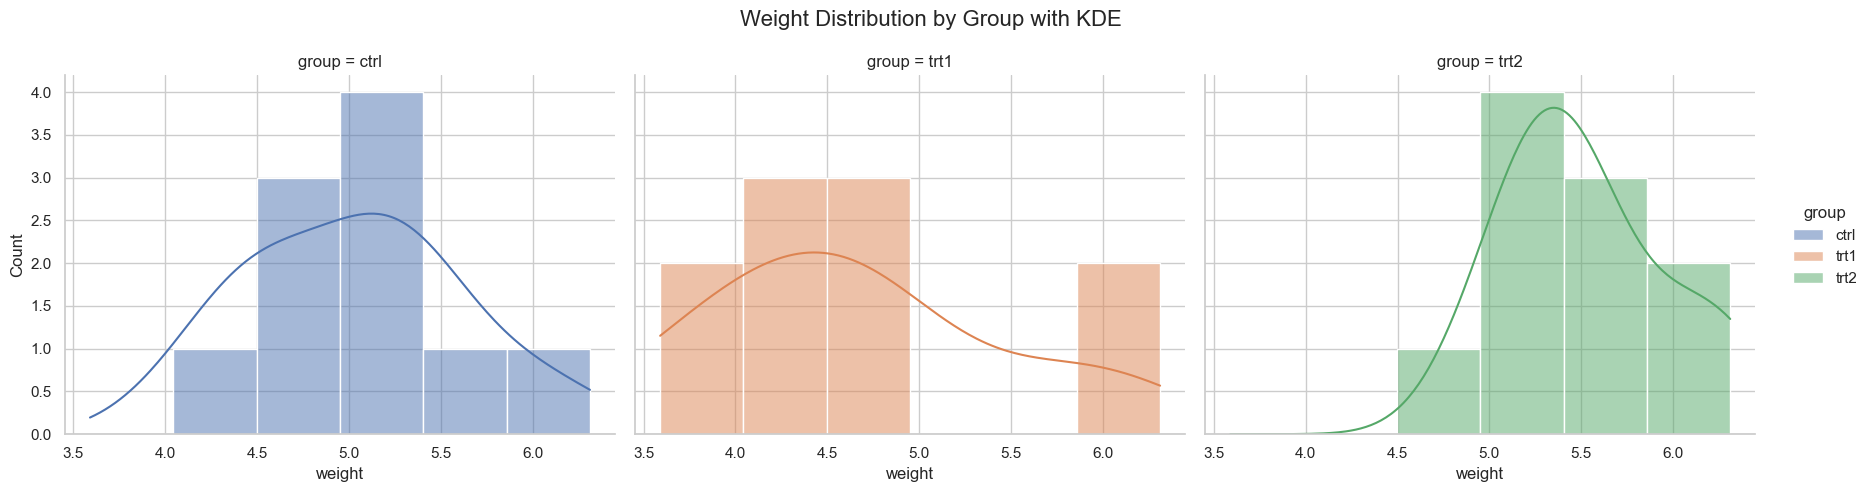

In [92]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a displot for the 'weight' distribution, differentiated by 'group'
sns.displot(data=df_plant_growth, x="weight", hue="group", col="group", kde=True, height=5, aspect=1.2)

# Add title for each subplot
plt.subplots_adjust(top=0.85)  # Adjust the spacing to accommodate titles
plt.suptitle("Weight Distribution by Group with KDE", fontsize=16)

# Show the plot
plt.show()

From this observation, the three distributions, one for each group, appear to be normally distributed but with different means and standard deviations. These characteristics will be further analyzed in the next section when we perform an independent t-test and an ANOVA test. Another useful graph is the KDE plot, which can show the overlapping distributions of the three groups. The KDE plot is created using the `kdeplot()` [[]](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) function, which provides a smooth estimate of the probability density function for each group, making it easier to compare the overall shape, spread, and central tendency of the distributions.  

Text(0, 0.5, 'Density')

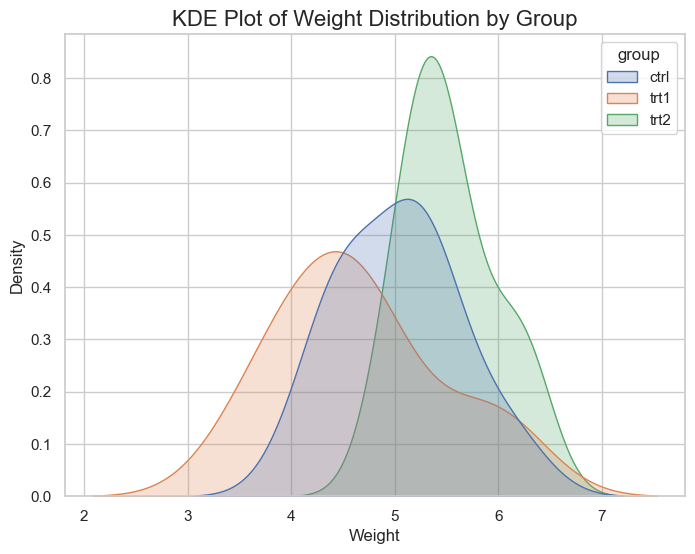

In [93]:
# Create a KDE plot for the 'weight' distribution, differentiated by 'group'
plt.figure(figsize=(8, 6))  # Set the figure size for clarity
sns.kdeplot(data=df_plant_growth, x="weight", hue="group", fill=True, common_norm=False)

# Add title and labels
plt.title("KDE Plot of Weight Distribution by Group", fontsize=16)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Density", fontsize=12)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a displot for the 'weight' distribution, differentiated by 'group'
sns.displot(data=df_plant_growth, x="weight", hue="group", kde=True, height=6, aspect=1.5)

# Add title
plt.title("Weight Distribution by Group with KDE", fontsize=16)

# Show the plot
plt.show()

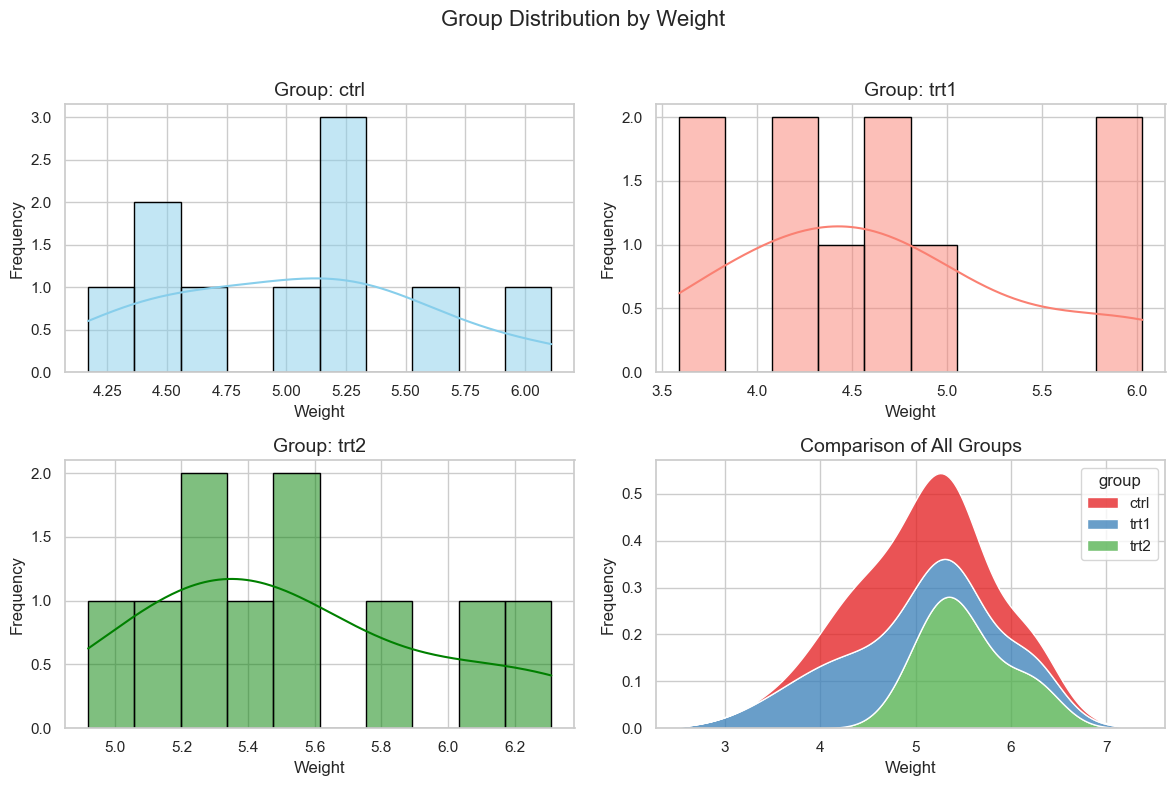

In [ ]:
# Set up the figure with 2 rows and 2 columns (4 subplots in total)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Set the title for the entire figure
plt.suptitle('Group Distribution by Weight', fontsize=16)

# Plot 1: Histogram for the 'ctrl' group
sns.histplot(df_plant_growth[df_plant_growth['group'] == 'ctrl']['weight'], kde=True, color='skyblue', bins=10, ax=axs[0, 0], edgecolor='black')
axs[0, 0].set_title('Group: ctrl', fontsize=14)
axs[0, 0].set_xlabel('Weight')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Histogram for the 'trt1' group
sns.histplot(df_plant_growth[df_plant_growth['group'] == 'trt1']['weight'], kde=True, color='salmon', bins=10, ax=axs[0, 1], edgecolor='black')
axs[0, 1].set_title('Group: trt1', fontsize=14)
axs[0, 1].set_xlabel('Weight')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Histogram for the 'trt2' group
sns.histplot(df_plant_growth[df_plant_growth['group'] == 'trt2']['weight'], kde=True, color='green', bins=10, ax=axs[1, 0], edgecolor='black')
axs[1, 0].set_title('Group: trt2', fontsize=14)
axs[1, 0].set_xlabel('Weight')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Overlapping histograms for all groups
sns.kdeplot(data=df_plant_growth, x="weight", hue="group", multiple="stack", ax=axs[1, 1], palette="Set1")

# Add the title and labels for the last subplot
axs[1, 1].set_title('Comparison of All Groups', fontsize=14)
axs[1, 1].set_xlabel('Weight')
axs[1, 1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping of elements
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to leave space for the main title

# Show the plot
plt.show()

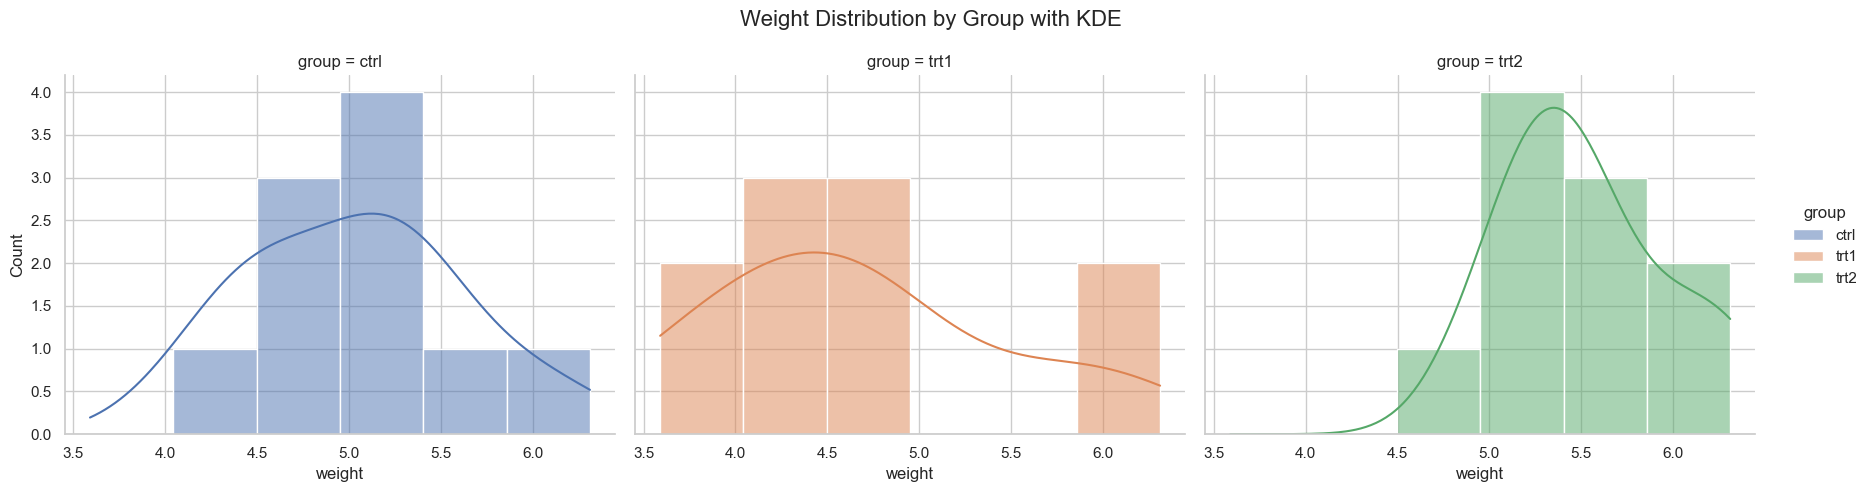

In [86]:
# Create a displot for the 'weight' distribution, differentiated by 'group'
sns.displot(data=df_plant_growth, x="weight", hue="group", col="group", kde=True, height=5, aspect=1.2)

# Add title for each subplot
plt.subplots_adjust(top=0.85)  # Adjust the spacing to accommodate titles
plt.suptitle("Weight Distribution by Group with KDE", fontsize=16)

# Show the plot
plt.show()



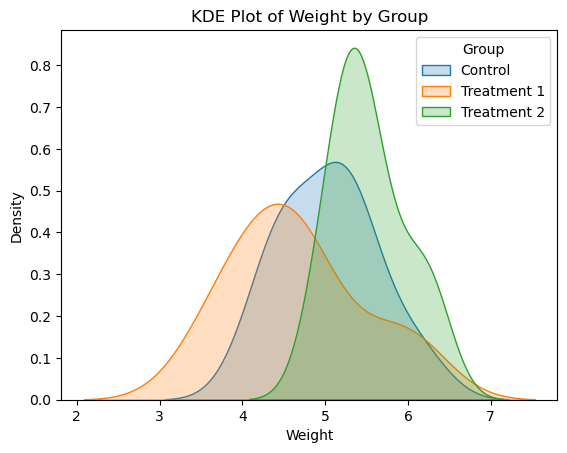

In [59]:
ctrl_d = df_plant_growth[df_plant_growth['group'] == 'ctrl']['weight']
trt1_d = df_plant_growth[df_plant_growth['group'] == 'trt1']['weight']
trt2_d = df_plant_growth[df_plant_growth['group'] == 'trt2']['weight']

# KDE plot for each group (ctrl, trt1, trt2) individually
sns.kdeplot(data=ctrl_d, label='Control', fill=True)
sns.kdeplot(data=trt1_d, label='Treatment 1', fill=True)
sns.kdeplot(data=trt2_d, label='Treatment 2', fill=True)

# Adding labels and title
plt.title("KDE Plot of Weight by Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend(title="Group")

# Display the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for the 'df_plant_growth' dataset, using 'group' as hue to differentiate between groups
sns.pairplot(data=df_plant_growth, hue="group")

# Display the plot
plt.show()

# KDE plot for each group (ctrl, trt1, trt2) individually
sns.kdeplot(data=ctrl_d, label='Control', fill=True)
sns.kdeplot(data=trt1_d, label='Treatment 1', fill=True)
sns.kdeplot(data=trt2_d, label='Treatment 2', fill=True)

# Adding labels and title
plt.title("KDE Plot of Weight by Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend(title="Group")

# Display the plot
plt.show()

In [58]:
sns.kdeplot(data=df_plant_growth, x="weight", hue="groups", multiple="stack")

ValueError: Could not interpret value `groups` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
ctrl_d = df_plant_growth[df_plant_growth['group'] == 'ctrl']['weight']
trt1_d = df_plant_growth[df_plant_growth['group'] == 'trt1']['weight']
trt2_d = df_plant_growth[df_plant_growth['group'] == 'trt2']['weight']

In [ ]:
# Set up the figure with 1 row and 3 columns (for each group)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create Q-Q plot for 'ctrl' group
stats.probplot(ctrl_d, dist='norm', plot=axs[0])
axs[0].set_title('Q-Q Plot - Group: ctrl')

# Create Q-Q plot for 'trt1' group
stats.probplot(trt1_d, dist='norm', plot=axs[1])
axs[1].set_title('Q-Q Plot - Group: trt1')

# Create Q-Q plot for 'trt2' group
stats.probplot(trt2_d, dist='norm', plot=axs[2])
axs[2].set_title('Q-Q Plot - Group: trt2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv("your_data.csv")  # example for reading the data

# Define the significance level
alpha = 0.05  # significance level

# Initialize lists to hold the results for both tests
results_shapiro = []
results_ks = []

# Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for each group
for group_name in ['ctrl', 'trt1', 'trt2']:
    # Filter the DataFrame to get the weight data for each group
    group_data = df_plant_growth[df_plant_growth['group'] == group_name]['weight']
    
    # Perform the Shapiro-Wilk test
    shapiro_stat, p_value_shapiro = stats.shapiro(group_data)
    p_value_shapiro = round(p_value_shapiro, 3)
    result_shapiro = "YES: The data is not normally distributed." if p_value_shapiro < alpha else "NO: The data may be normally distributed."
    results_shapiro.append([group_name, p_value_shapiro, result_shapiro])
    
    # Perform the Kolmogorov-Smirnov test against a normal distribution
    mean = group_data.mean()
    std = group_data.std()
    ks_stat, p_value_ks = stats.kstest(group_data, 'norm', args=(mean, std))
    p_value_ks = round(p_value_ks, 3)
    result_ks = "YES: The data is not normally distributed." if p_value_ks < alpha else "NO: The data may be normally distributed."
    results_ks.append([group_name, p_value_ks, result_ks])

# Use tabulate to format the results for better presentation
headers = ['Group', 'P-value', 'Reject the null hypothesis?']

# Print the results with headers for both tests
print("==== Shapiro-Wilk Test ====")
table_shapiro = tabulate(results_shapiro, headers=headers, tablefmt='pretty')
print(table_shapiro)

print("\n==== Kolmogorov-Smirnov Test ====")
table_ks = tabulate(results_ks, headers=headers, tablefmt='pretty')
print(table_ks)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the columns 'group' and 'weight'

# Create a 2x2 grid of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjusted the size for horizontal layout
plt.suptitle('Weight for Each Group', fontsize=16)  # Adds a title for the whole figure

# Plot 1: Strip plot
sns.stripplot(x='group', y='weight', hue='group', data=df, palette='Set2', jitter=True, ax=axs[0][0], dodge=True)
axs[0][0].set_title('Strip Plot', fontsize=12)
axs[0][0].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 2: Boxplot
sns.boxplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[0][1])
axs[0][1].set_title('Box Plot', fontsize=12)
axs[0][1].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 3: Violin Plot
sns.violinplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[1][0])
axs[1][0].set_title('Violin Plot', fontsize=12)
axs[1][0].set_ylabel('Weight', fontsize=10)  # Set y-axis label

# Plot 4: Combined Strip, Box and Violin Plot
sns.stripplot(x='group', y='weight', hue='group', data=df, palette='Blues', jitter=False, dodge=False, ax=axs[1][1], alpha=0.6)
sns.boxplot(x='group', y='weight', hue='group', data=df, palette='Blues', ax=axs[1][1], width=0.4, fliersize=0, color='black')  
sns.violinplot(x='group', y='weight', hue='group', data=df, palette='Set2', ax=axs[1][1], alpha=0.4)
axs[1][1].set_title('Strip + Box + Violin Plot', fontsize=12)
axs[1][1].set_ylabel('Weight', fontsize=10)  # Set y-axis label


# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()


https://www.pythonfordatascience.org/parametric-assumptions-python/

In [ ]:
import numpy as np
import scipy.stats as stats

# Assuming 'df' is your DataFrame and contains the column 'group' and 'weight'
# Filter the data for the two groups
trt1_data = df[df['group'] == 'trt1']['weight']
trt2_data = df[df['group'] == 'trt2']['weight']

# Perform Levene's Test for Equal Variances
stat, p_value = stats.levene(trt1_data, trt2_data)

# Output the result of Levene's Test
print("==== Levene's Test for Equal Variances ==== \n")
print(f"statistic: {stat}")
print(f"p-value: {p_value} \n")

# If the p-value is greater than 0.05, we fail to reject the null hypothesis (equal variances)
if p_value > 0.05:
    print("Reject the null hypotesis?")
    print("NO: The data may have equal variances")
else:
    print("Reject the null hypotesis?")
    print("YES: The data may NOT have equal variances")


In [ ]:
import numpy as np
import scipy.stats as stats

# Assuming 'df' is your DataFrame and contains the column 'group' and 'weight'
# Filter the data for the two groups
trt1_data = df[df['group'] == 'trt1']['weight']
trt2_data = df[df['group'] == 'trt2']['weight']

# Perform Bartlett's Test for Equal Variances
stat, p_value = stats.bartlett(trt1_data, trt2_data)

# Output the result of Bartlett's Test
print("==== Bartlett's Test for Equal Variances ==== \n")
print(f"statistic: {stat}")
print(f"p-value: {p_value} \n")

# If the p-value is greater than 0.05, we fail to reject the null hypothesis (equal variances)
if p_value > 0.05:
    print("Reject the null hypothesis?")
    print("NO: The data may have equal variances.")
else:
    print("Reject the null hypothesis?")
    print("YES: The data may NOT have equal variances.")